* Essayons d'extraire l'essentiel des données depuis la db. 
* Définisons les structures de donnée adéquate afin de pouvoir manipuler les donnée rapidement.

# Users Table :

## Desctription
```
            Table "public.users"
    Column     |  Type   |
---------------+---------+
 user_id       | text    |
 creation_date | date    |
 administrator | integer |
 instructor    | integer |
 demo          | integer |
 unregistered  | integer |
```

## Users to be ignored :
### 1) Admin user

``` 
 test1=# select user_id from users where administrator!=0;
 user_id 
---------
 U00002
 U00216
 U00283
 U00000
 U00001
 U00003
 U00215
(7 rows)

test1=# select count(*) from submissions where user_id in (select user_id from users where administrator!=0);
 count 
-------
 11422
(1 row)

```
### 2) Demo user
```
test1=# select user_id from users where demo!=0;
 user_id 
---------
 U00004
(1 row)

test1=# select count(*) from submissions where user_id in (select user_id from users where demo!=0);
 count 
-------
   971
(1 row)

```
### 3) Instructors

```
test1=# select count(*) from users where instructor!=0;
 count 
-------
    50
(1 row)

test1=# select count(*) from submissions where user_id in (select user_id from users where instructor!=0);
 count 
-------
 17990
(1 row)

``` 




## Get the working users dataframe :

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import psycopg2

con = psycopg2.connect("dbname=test1")

In [13]:
users = pd.read_sql_query("select user_id, creation_date from users \
                            where demo=0 and instructor=0 and administrator=0\
                            and user_id like 'U%';",con=con)

In [14]:
users.describe()

,user_id,creation_date
count,10512,10512
unique,10512,1364
top,U15871,2010-09-28
freq,1,1659


# Submission table :

## Description

```
                 Table "public.submissions"
        Column        |              Type              |
----------------------+--------------------------------+
 submission_uid       | text                           |
 user_id              | text                           |
 problem_id           | text                           |
 submission_id        | text                           |
 compiler_id          | text                           |
 state                | text                           |
 time_in              | timestamp(0) without time zone |
 time_out             | timestamp(0) without time zone |
 veredict             | text                           |
 veredict_info        | text                           |
 internal_error       | text                           |
 legacy               | integer                        |
 veredict_publics     | text                           |
 ok_publics_but_wrong | integer                        |
 score                | text                           |

```

Select only instance from correct users ids..

In [15]:
ids = users['user_id']
l = ids.values.tolist()

In [16]:
df = pd.read_sql_query("select count(*) from submissions where user_id in \
                            (%s);" % str(l).strip('[]'), con=con)

In [42]:
import timeit

start = timeit.default_timer()
submissions = pd.read_sql_query("select submission_uid, user_id, problem_id, submission_id, \
                        state, time_out, time_in, veredict, score \
                        from submissions where user_id in \
                        (%s) and problem_id like 'P%%';" % str(l).strip('[]'), 
                       con=con)

stop = timeit.default_timer()

print "It took %.2f seconds to compute the request" % (stop - start)

It took 8.36 seconds to compute the request


### Get rid of language ids

In [43]:
submissions.problem_id = submissions.problem_id.apply(lambda x: x[:-3])

In [44]:
submissions.describe()

,submission_uid,user_id,problem_id,submission_id,state,time_out,time_in,veredict,score
count,1394765,1394765,1394765,1394765,1394765,1394764,1394765,1394765,5752
unique,1394765,7539,1191,84,2,1302085,1329019,11,47
top,S000805276,U14908,P97156,S001,done,2012-10-16 19:57:44,2006-09-20 09:29:26,AC,100/100
freq,1,2357,21271,522981,1394764,8,10,608361,1612
first,NaN,NaN,NaN,NaN,NaN,2010-07-12 11:07:31,2006-09-09 11:13:56,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2016-02-24 09:24:20,2016-02-24 09:24:15,NaN,NaN


In [45]:
submissions

,submission_uid,user_id,problem_id,submission_id,state,time_out,time_in,veredict,score
0,S000469881,U00006,P88760,S001,done,2011-04-27 01:49:55,2011-04-27 01:49:46,AC,None
1,S000469885,U00006,P88760,S002,done,2011-04-27 02:36:21,2011-04-27 02:36:13,AC,None
2,S000469887,U00006,P88760,S003,done,2011-04-27 02:51:06,2011-04-27 02:50:58,AC,None
3,S000470232,U00006,P88760,S004,done,2011-04-27 16:12:39,2011-04-27 16:12:30,EE,None
4,S000470233,U00006,P88760,S005,done,2011-04-27 16:13:30,2011-04-27 16:13:22,AC,None
5,S000470242,U00006,P88760,S006,done,2011-04-27 16:51:46,2011-04-27 16:51:37,EE,None
6,S000470243,U00006,P88760,S007,done,2011-04-27 16:52:32,2011-04-27 16:52:23,AC,None
7,S000470246,U00006,P88760,S008,done,2011-04-27 16:59:34,2011-04-27 16:59:16,EE,None
8,S000470248,U00006,P88760,S009,done,2011-04-27 17:00:45,2011-04-27 17:00:37,EE,None
9,S000470249,U00006,P88760,S010,done,2011-04-27 17:01:33,2011-04-27 17:01:24,EE,None


### Veredict distribution

In [41]:
pd.unique(submissions.veredict)

array(['AC', 'EE', 'WA', 'CE', 'IC', 'PE', 'SE', 'SC', 'NC', 'FE',
       'Pending'], dtype=object)

In [42]:
veredicts = pd.value_counts(submissions.veredict)
print veredicts

AC         669441
WA         466952
EE         176918
CE         172100
PE          56170
SC          14479
IC           4500
SE            141
FE             57
NC              3
Pending         1
Name: veredict, dtype: int64


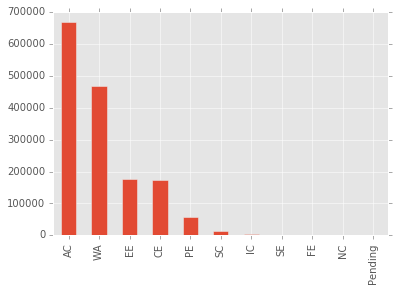

In [49]:
veredicts.plot(kind="bar")

### Submission time distribution 

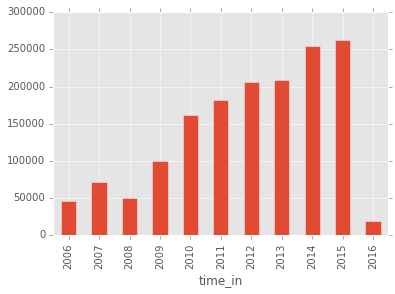

In [73]:
p = submissions.time_in
p.groupby(submissions.time_in.dt.year).count().plot(kind="bar")

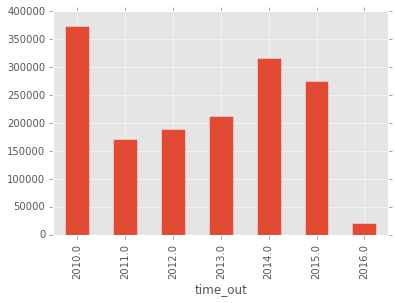

In [74]:
p = submissions.time_out
p.groupby(submissions.time_out.dt.year).count().plot(kind="bar")

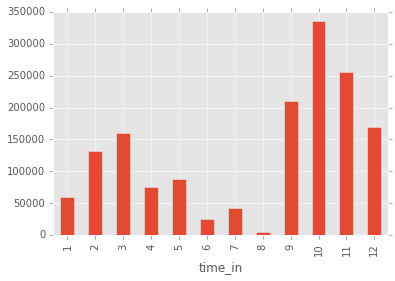

In [75]:
p = submissions.time_in
p.groupby(submissions.time_in.dt.month).count().plot(kind="bar")

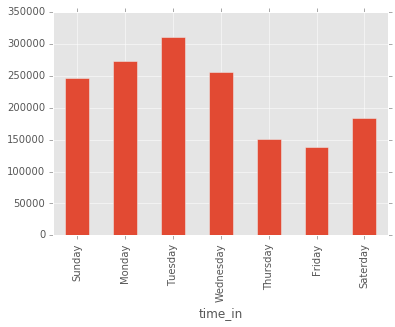

In [86]:
p = submissions.time_in
p.groupby(submissions.time_in.dt.dayofweek).count().plot(kind="bar")

DayOfWeekOfCall = ²range(7)
LABELS = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saterday"]

plt.xticks(DayOfWeekOfCall, LABELS)
plt.show()
